# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [33]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [10]:
data.shape

(4870, 65)

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [6]:
pd.options.display.max_columns = None

In [7]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,1,0,0,1,0,Allison,f,w,0.0,1.0,0.0,c,a,384.0,0.989360,0.005500,9.527484,0.274151,0.037662,8.706325,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,6,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,5,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

## Q1: What test is appropriate for this problem? Does CLT apply?

<b> Binomial Distribution </b> : https://en.wikipedia.org/wiki/Binomial_distribution

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own boolean-valued outcome: success/yes/true/one (with probability p) or failure/no/false/zero (with probability q = 1 − p).

A single success/failure experiment is also called a Bernoulli trial. For a single trial, i.e., n = 1, the binomial distribution is a Bernoulli distribution.

In this problem the column <b> call </b> clearly presents a binomial distribution where success is the value 1, i.e. when the call is made to the applicant and failure is the value 0 , i.e when the call is not made to the applicant.

Each record of the column <b> call </b> repreents a Bernoulli trial whereas the number of success(call value = 1) for 2435 resumes represents a binomial distribution.

<b> Central Limit Theorem </b> : https://en.wikipedia.org/wiki/Central_limit_theorem

In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed.

In its common form, the random variables must be identically distributed.

In this problem the resumes are randomly assigned to a black sounding or white sounding names, hence the variables 
are random variables. Also as it can be reasonably assumed that assignment of a race to one record is not dependent on assignment of a race to another record, the records are independent as well.

We can see that in this problem altough the original variable i.e. the number of successes (call value = 1) is binomially distributed, as per CLT, we can say that the proportion of success which is nothing but normalized sum of success calls will tend toward a normal distribution.

<b> In conclusion, the CLT applies to this problem. As far as the appropriate test is concerned, as the proportion of success of population is not known, a t-test comparing the proportions of two groups will be appropriate here.</b>

## Q2: What are the null and alternate hypotheses?

<b> Null Hypothesis (H0)</b>: The proportion of calls made to white sounding names and black sounding names are same.

<b> Alternate Hypothesis (H1)</b>: The proportion of calls made to white sounding names and black sounding names are not same.







In [8]:
w = data[data.race=='w']
b = data[data.race=='b']

In [11]:
w.shape

(2435, 65)

In [9]:
np.mean(w.call)-np.mean(b.call)

0.03203285485506058

In [7]:
# Your solution to Q3 here

In [24]:
pd.options.display.max_columns = None

In [226]:
b['yearsexp'].head()

2     6
3     6
7    21
8     3
9     6
Name: yearsexp, dtype: int8

In [220]:
#sns.distplot(data['call'])

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

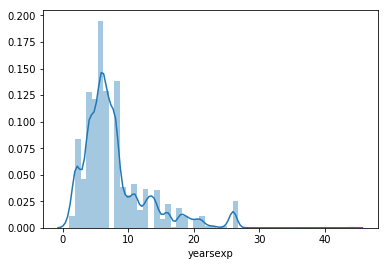

In [227]:
sns.distplot(data['yearsexp'])

In [33]:
data.head()

0     6
1     6
4    22
5     6
6     5
Name: yearsexp, dtype: int8

In [228]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import shapiro

data = data['yearsexp']
stat_shapiro, p_shapiro = shapiro(data)

print(p_shapiro)

stat_k2, p_k2 = normaltest(data)

print(p_k2)

0.0
0.0


In [37]:
b.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc,col,expminreq,schoolreq,eoe,parent_sales,parent_emp,branch_sales,branch_emp,fed,fracblack_empzip,fracwhite_empzip,lmedhhinc_empzip,fracdropout_empzip,fraccolp_empzip,linc_empzip,manager,supervisor,secretary,offsupport,salesrep,retailsales,req,expreq,comreq,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
2,b,1,4,1,6,0,0,0,0,19,1,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329,1.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,5,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141,0.0,5,,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
7,b,1,3,4,21,0,1,0,1,313,5,0,1,1,1,Kenya,f,b,1.0,0.0,0.0,c,a,385.0,0.116624,0.728339,10.287047,0.139843,0.365636,9.933725,0.0,some,,1.0,9.4,143.0,9.4,143.0,0.0,0.204764,0.727046,10.619399,0.070493,0.369903,10.007352,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit
8,b,1,4,3,3,0,0,0,0,316,6,0,0,1,1,Latonya,f,b,0.0,1.0,0.0,c,s,386.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859,1.0,,,1.0,40.0,135.0,40.0,135.0,0.0,0.008141,0.973413,11.137956,0.047958,0.413306,10.393723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private
9,b,1,4,2,6,0,1,0,0,263,4,1,1,0,1,Tyrone,m,b,1.0,0.0,0.0,c,s,386.0,0.992043,0.004814,8.841738,0.295093,0.053182,8.507345,1.0,,,1.0,40.0,135.0,40.0,135.0,0.0,0.008141,0.973413,11.137956,0.047958,0.413306,10.393723,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [229]:
#from scipy import stats
#t_stat, p_val = stats.ttest_ind(b['call'], w['call'], axis=0, equal_var = True, nan_policy='propagate')

In [230]:
#t_stat,p_val

## What are the null and alternate hypotheses?

H0: pw - pb = 0

H1: pw - pb != 0

## Whether to do a t-test or z-test 

My take : Do a z-test as len(b)*pb > 10 and len(w)* pw > 10 

In [14]:
# calculate the values of variables required for the statistical test
nb = len(b) # black sample size
nw = len(w) # white sample size
pb = sum(b.call)/nb # black callback rate
pw = sum(w.call)/nw # white callback rate

In [31]:
callb = sum(b.call)
callw = sum(w.call)

## Shall we test equal or unequal variance in this case?

In [32]:
import math
import scipy

p_pooled = (callb + callw)/(nb+ nw) # joint callback

std_hat_equal = np.sqrt(p_pooled*(1-p_pooled)*((1/nb)+(1/nw))) # assuming equal variances of the two groups

std_hat_unequal = np.sqrt(((pb*(1-pb))/nb) + ((pw*(1-pw))/nw)) # assuming unequal variances of the two groups

test_stat_equal = (pw-pb)/std_hat_equal
test_stat_unequal = (pw-pb)/std_hat_unequal

#p_val = stats.t.sf(abs(test_stat), len(data)-1)*2

p_val_equal = scipy.stats.norm.sf(abs(test_stat_equal))*2
p_val_unequal = scipy.stats.norm.sf(abs(test_stat_unequal))*2

print('z-stat_equal:',test_stat_equal,' p_value_equal',p_val_equal)
print('z-stat_unequal:',test_stat_unequal,'   p_value_unequal',p_val_unequal)

#print('p value:',p_val)

p_val_tstat_equal = stats.t.sf(abs(test_stat_equal), len(data)-1)*2
p_val_tstat_unequal = stats.t.sf(abs(test_stat_unequal), len(data)-1)*2

print('t-stat_equal:',test_stat_equal,' p_value_equal',p_val_tstat_equal)
print('t-stat_unequal:',test_stat_unequal,'   p_value_unequal',p_val_tstat_unequal)

z-stat_equal: 4.108412152434346  p_value_equal 3.983886837585077e-05
z-stat_unequal: 4.11555043573    p_value_unequal 3.862565207522622e-05
t-stat_equal: 4.108412152434346  p_value_equal 4.0493178875903686e-05
t-stat_unequal: 4.11555043573    p_value_unequal 3.926425924210384e-05


In [243]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.proportion import proportions_ztest
statsmodels.stats.proportion.proportions_ztest(np.array([callb,callw]), np.array([nb,nw]))

(-4.108412152434346, 3.983886837585077e-05)

In [16]:
varpb = pb*(1-pb)
varpw = pw*(1-pw)

In [29]:
from scipy.stats import ttest_ind_from_stats
ttest_ind_from_stats(mean1=pw, std1=np.sqrt(varpw), nobs1=nw,
                    mean2=pb, std2=np.sqrt(varpb), nobs2=nb, equal_var = True)

Ttest_indResult(statistic=4.11555043573, pvalue=3.926439120706929e-05)

In [25]:
w['call'].value_counts()

0.0    2200
1.0     235
Name: call, dtype: int64

In [21]:
from scipy.stats import ttest_ind
ttest_ind(w,b)

C:\Users\barun\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Try using both the bootstrapping and the frequentist statistical approaches.

In [268]:
#bootstrap hypothesis test
def bootstrap(data, func):
    
    bs_samples = np.random.choice(data, len(data))
    return func(bs_samples)

def draw_bootstrap_samples(data, func, size = 1):
    
    bs_replicates = np.empty(size)
    
    # Generate Replicates
    for i in range(size):
        bs_replicates[i] = bootstrap(data,func)
    return bs_replicates

In [269]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [270]:
w = data[data.race=='w']
b = data[data.race=='b']

In [271]:
sum(w.call)/len(w)

0.09650924024640657

In [272]:
sum(b.call)/len(b)

0.06447638603696099

In [273]:
observed_mean = (sum(w.call)/len(w)) - (sum(b.call)/len(b))

In [251]:
#def prop(data):
 #   prop = sum(data)/len(data)
  #  return prop

In [274]:
wbmean = np.sum(data.call)/len(data)

In [275]:
wbmean

0.08049281314168377

In [276]:
w.call = w.call - sum(w.call)/nw + wbmean

In [277]:
w.call.mean()

0.08049110323190689

In [278]:
b.call = b.call - sum(b.call)/nb + wbmean

In [279]:
b.call.mean()

0.08049406856298447

In [280]:
w_samples = draw_bootstrap_samples(w.call, np.mean, 10000 )
b_samples = draw_bootstrap_samples(b.call, np.mean, 10000)

In [281]:
wb_sample_difference = w_samples - b_samples

In [282]:
wb_sample_difference.mean()

-3.485046289861202e-05

In [283]:
np.sum(wb_sample_difference >= observed_mean)/len(wb_sample_difference)

0.0